# Hawaiian Airlines Optimal Overbooking Seat Number Simulation

### Load Libraries

In [593]:
set.seed(42)

library(dplyr)
library(readxl)
library(vecsets)
library(distr)
library(ggplot2)
library(reshape2)
library(resample)

### Set Color Palette and Options

In [512]:
hawaiian_lightpurple <- '#b12a89'
hawaiian_darkpurple <- '#452a87'
hawaiian_pink <- '#f37961'

In [2]:
options(warn=-1)
#options(warn=0)

### Fill Seats

In [720]:
# empty seat rates

main_empty_rate <- function(t){(0.00162*(-0.4*t-(-4.9))^6)/100}
exc_empty_rate <- function(t){0.0005*exp(1.6*(t-(4.05)^2))/100}

In [986]:
am = c(0.30, 0.26, 0.20, 0.12, 0.08, 0.02, 0.015, 0.005, 0.0000000001, 0.0000000001)
mid = c(0.15, 0.28, 0.25, 0.13, 0.1, 0.05, 0.02, 0.019, 0.00075, 0.00025)
pm = c(0.25, 0.25, 0.22, 0.11, 0.09, 0.05, 0.02, 0.009, 0.00075, 0.00025)
eve = c(0.28, 0.26, 0.19, 0.14, 0.08, 0.03, 0.015, 0.005, 0.0000000001, 0.0000000001)
print('AM')
sample(50, x = 1:10, replace = TRUE, prob = am)
print('MID')
sample(50, x = 1:10, replace = TRUE, prob = mid)
print('PM')
sample(50, x = 1:10, replace = TRUE, prob = pm)
print('EVE')
sample(50, x = 1:10, replace = TRUE, prob = eve)

[1] "AM"


[1] 2 4 1 2 3 5 5 4 4 3 3 1 5 3 3 3 2 2 1 1 3 2 2 2 1 2 1 7 2 4 3 1 2 1 5 1 3 1
[39] 3 2 4 3 6 1 3 4 2 5 1 2

[1] "MID"


[1] 1 1 2 1 1 2 2 4 4 3 1 4 2 3 2 3 4 3 3 1 7 2 3 6 5 3 3 3 4 1 4 6 2 2 7 3 5 1
[39] 1 1 2 3 3 3 1 5 3 5 4 3

[1] "PM"


[1] 3 3 1 3 2 2 3 4 3 1 1 3 1 1 3 3 1 2 1 2 2 3 7 2 4 4 4 3 1 3 3 2 3 2 6 5 3 3
[39] 2 1 4 1 4 2 1 2 5 3 6 1

[1] "EVE"


[1] 2 3 6 2 1 2 2 6 4 3 2 2 1 2 2 2 7 1 4 3 2 1 4 2 1 2 3 5 2 3 4 4 2 2 1 2 1 2
[39] 1 3 1 2 3 3 3 3 2 1 1 2

In [722]:
fill_seats <- function(max_seats, t, empty_rate){
    
    am = c(0.30, 0.26, 0.20, 0.12, 0.08, 0.02, 0.015, 0.005, 0.0000000001, 0.0000000001)
    mid = c(0.15, 0.28, 0.25, 0.13, 0.1, 0.05, 0.02, 0.019, 0.00075, 0.00025)
    pm = c(0.25, 0.25, 0.22, 0.11, 0.09, 0.05, 0.02, 0.009, 0.00075, 0.00025)
    eve = c(0.28, 0.26, 0.19, 0.14, 0.08, 0.03, 0.015, 0.005, 0.0000000001, 0.0000000001)    
    
    if (t > 19){time <- eve} else if (t > 15){time <- pm} else if (t > 10){time <- mid} else {time <- am}
    
    # instantiate values and vectors
    group_total = 0
    groups <- c()
    
    # random number of empty unsold seats
    to_empty <- rbinom(1, max_seats, empty_rate) 

    # run until we have at least filled all available seats - unsold
    while(group_total <= max_seats - to_empty){
        
        # generate one random group number at a time for approriate time interval
        group <- sample(1, x = 1:10, replace = TRUE, prob = time)
        # add number in the group to total amount and add group to groups vector
        group_total = group_total + group
        groups <- c(groups, group)         
        }
    
    # ensure the flight is full and not overbooked, remove overbooked by index
    rm_idx <- which.max(groups == (group_total - max_seats))
    groups <- groups[-rm_idx]

    return (groups)
    
}

In [1072]:
sample_groups <- fill_seats(120, 12, main_empty_rate(12))
sample_groups
sample_sum <- sum(sample_groups)
sample_sum

[1] 3 4 3 2 5 1 3 1 3 2 4 3 2 5 3 6 1 2 2 3 2 2 2 3 2 3 2 2 3 2 6 1 8 5 6 2 3 1
[39] 2 5

[1] 120

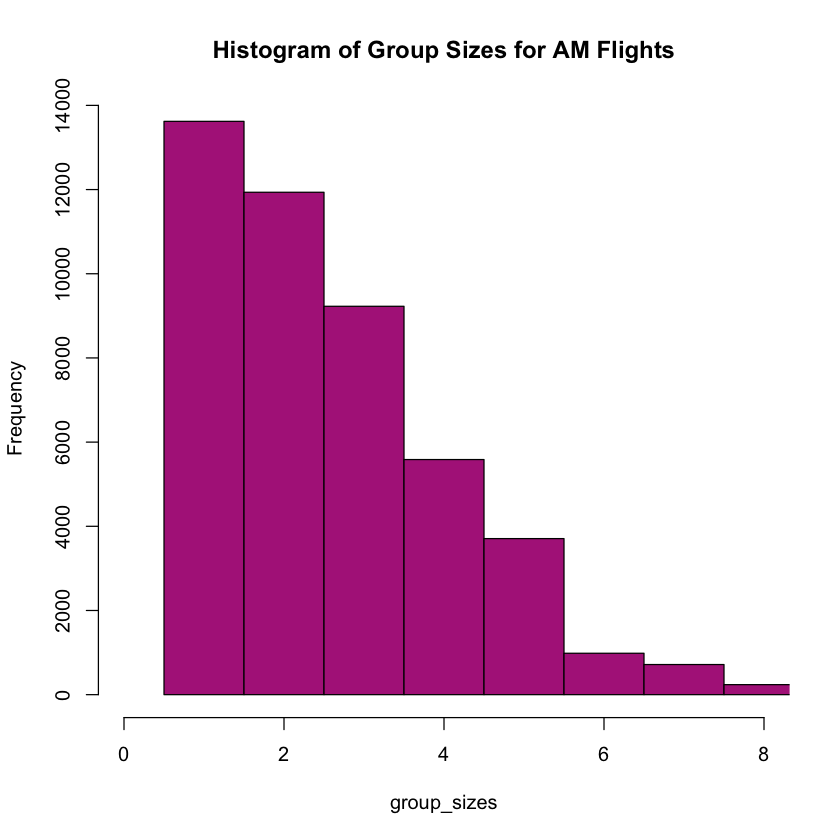

In [1070]:
group_sizes <- c()

for (t in 1:1000){
    sample_groups <- fill_seats(120, 5, main_empty_rate(5))
    group_sizes <- c(group_sizes, sample_groups)
    }

hist(group_sizes, col= hawaiian_lightpurple, xlim= c(0,8), breaks=seq(0.5,8.5,1), main = 'Histogram of Group Sizes for AM Flights')


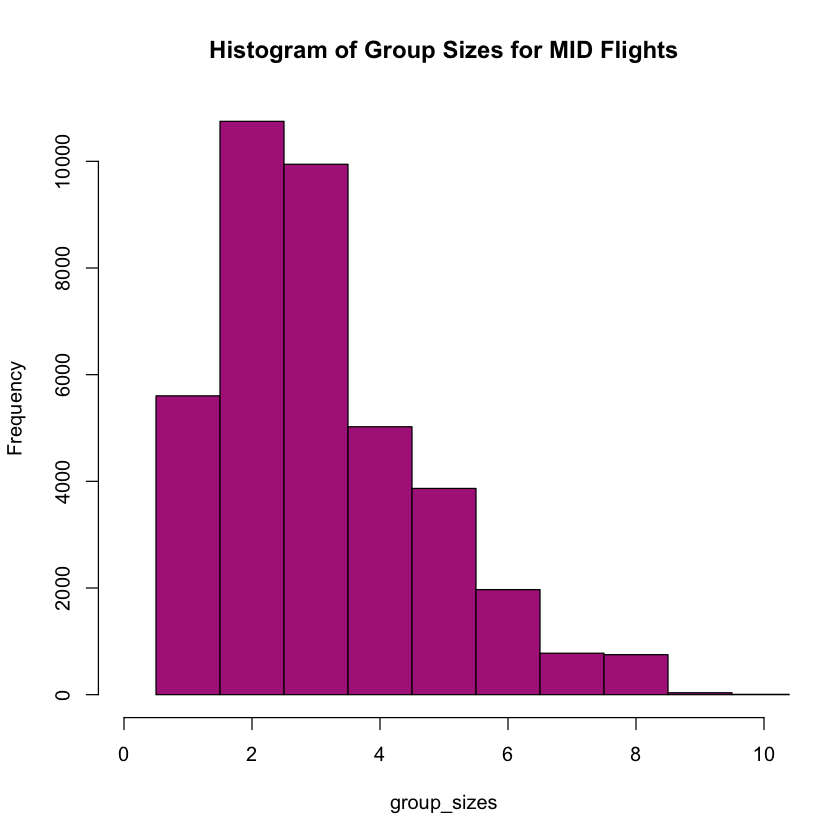

In [991]:
group_sizes <- c()

for (t in 1:1000){
    sample_groups <- fill_seats(120, 12, main_empty_rate(12))
    group_sizes <- c(group_sizes, sample_groups)
    }

hist(group_sizes, col= hawaiian_lightpurple, xlim= c(0,10), breaks=seq(0.5,10.5,1), main = 'Histogram of Group Sizes for MID Flights')

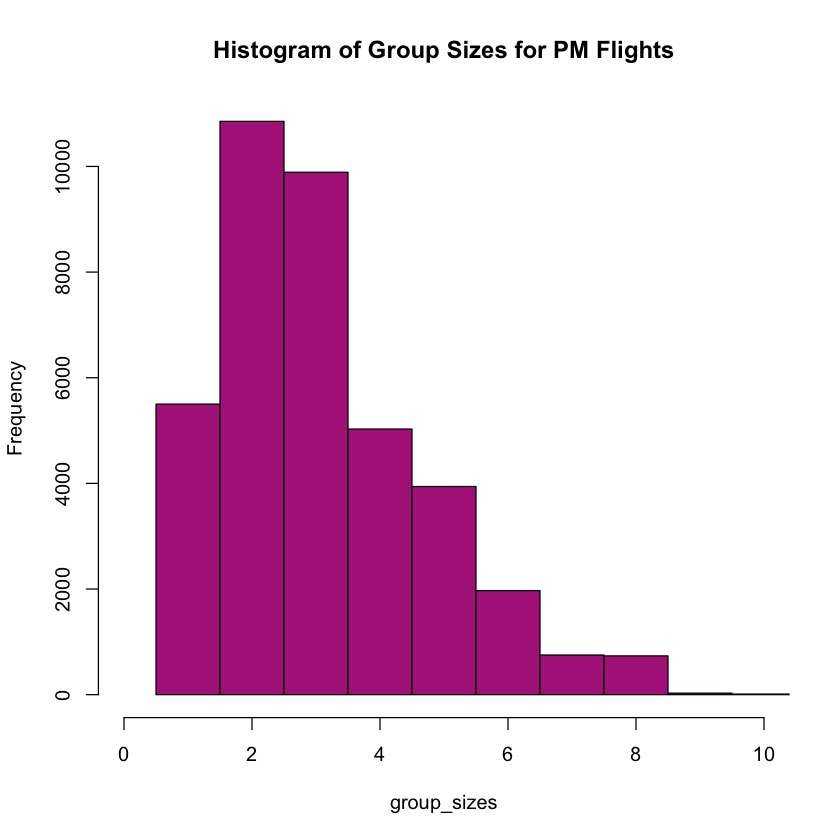

In [993]:
group_sizes <- c()

for (t in 1:1000){
    sample_groups <- fill_seats(120, 15, main_empty_rate(15))
    group_sizes <- c(group_sizes, sample_groups)
    }

hist(group_sizes, col= hawaiian_lightpurple, xlim= c(0,10), breaks=seq(0.5,10.5,1), main = 'Histogram of Group Sizes for PM Flights')

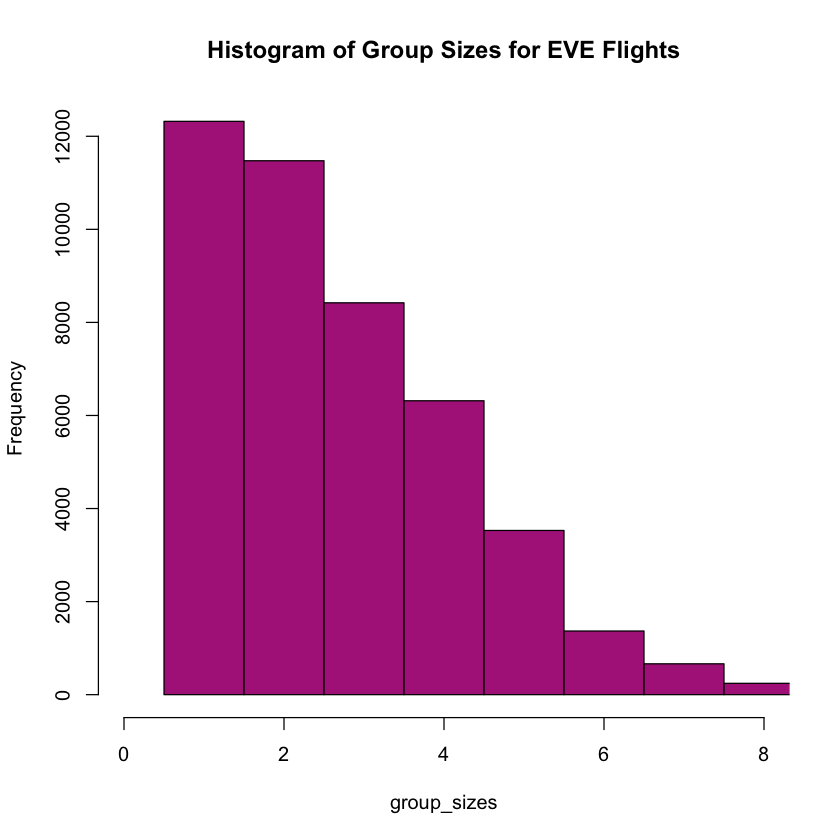

In [994]:
group_sizes <- c()

for (t in 1:1000){
    sample_groups <- fill_seats(120, 20, main_empty_rate(20))
    group_sizes <- c(group_sizes, sample_groups)
    }

hist(group_sizes, col= hawaiian_lightpurple, xlim= c(0,8), breaks=seq(0.5,8.5,1), main = 'Histogram of Group Sizes for EVE Flights')

### Groups Cancel

In [359]:

vals <- c(seq(1, 6))
main_cond_probs <- c(0.8713, 0.9092, 0.9452, 0.9728, 0.9891, 0.9999)
exc_cond_probs <- c(0.9294, 0.9301, 0.9356, 0.9452, 0.9848, 0.9999)


In [360]:
# groups cancel

groups_cancel <- function(groups, vals, cond_probs){

    showed_up <- c()
    
    for (g in groups){
        
    U1 <- runif(1, 0, 1)        
        
        if (g == vals[1]){
            if(U1 <= cond_probs[1]){
                showed_up <- c(showed_up, g)
            }
        }
        if (g == vals[2]){
            if(U1 <= cond_probs[2]){
                showed_up <- c(showed_up, g)
            }
        }        
        if (g == vals[3]){
            if(U1 <= cond_probs[3]){
                showed_up <- c(showed_up, g)
            }
        }          
        if (g == vals[4]){
            if(U1 <= cond_probs[4]){
                showed_up <- c(showed_up, g)
            }
        }    
        if (g == vals[5]){
            if(U1 <= cond_probs[5]){
                showed_up <- c(showed_up, g)
            }
        }          
        if (g >= vals[6]){
            if(U1 <= cond_probs[6]){
                showed_up <- c(showed_up, g)
            }
        }                 
    }    
    return (showed_up)
}

In [1019]:
sample_groups <- fill_seats(120, 12, main_empty_rate(12))
sample_groups
sum(sample_groups)
groups_showed <- groups_cancel(sample_groups, vals, main_cond_probs)
groups_showed
sum(groups_showed)

[1] 2 2 5 6 2 1 2 6 2 5 2 2 2 4 3 5 3 3 3 2 1 2 7 5 6 6 2 3 4 7 4 2 2 7

[1] 120

[1] 2 2 5 6 2 1 2 6 2 5 2 2 2 4 3 5 3 3 3 2 1 2 7 5 6 6 2 3 7 4 2 2 7

[1] 116

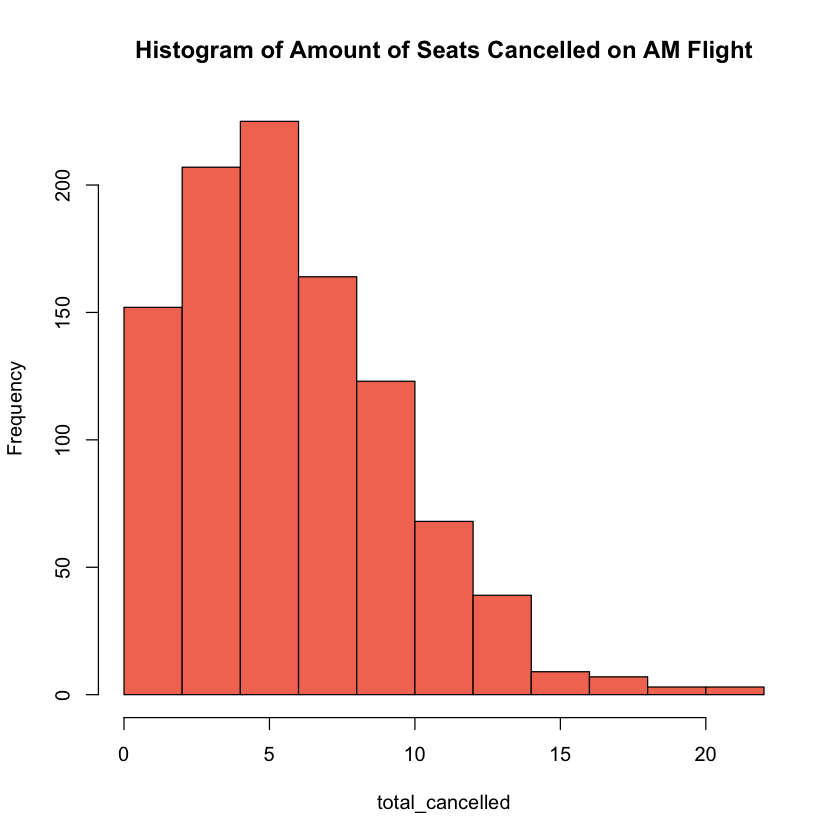

In [1021]:
total_cancelled <- c()

for (t in 1:1000){
    sample_groups <- fill_seats(120, 5, main_empty_rate(5))
    groups_showed <- groups_cancel(sample_groups, vals, main_cond_probs)
    sample_cancelled <- sum(sample_groups) - sum(groups_showed)
    total_cancelled <- c(total_cancelled, sample_cancelled)
    }

hist(total_cancelled, col= hawaiian_pink, main = 'Histogram of Amount of Seats Cancelled on AM Flight')

### Airline Fleet and Revenue

In [364]:
max_seats_main <- function(plane){
    
    if(plane == "A332"){
        return (192)
    }
    if(plane == "A21N"){
        return (129)
    }
    if(plane == "B712"){
        return (120)
    } 
}

In [365]:
max_seats_exc <- function(plane){
    
    if(plane == "A332"){
        return (68)
    }
    if(plane == "A21N"){
        return (44)
    }
    if(plane == "B712"){
        return (0)
    } 
}

In [366]:
main_rev <- function(main_booked, plane){
    
    total_main_rev <- 0.0
 
    if (plane == "A332"){
        for (group in main_booked){
            group_rev <- round(rnorm(1, mean=240, sd=40),2) * group
            total_main_rev = total_main_rev + group_rev
          }
        }
    if (plane == "A21N"){
        for (group in main_booked){
            group_rev <- round(rnorm(1, mean=180, sd=30),2) * group
            total_main_rev = total_main_rev + group_rev
          }
        }
    if (plane == "B712"){
        for (group in main_booked){
            group_rev <- round(rnorm(1, mean=120, sd=20),2) * group
            total_main_rev = total_main_rev + group_rev
          }
        }    
    return (total_main_rev)
}


In [367]:
exc_rev <- function(exc_booked, plane){
    
    total_exc_rev <- 0.0
 
    if (plane == "A332"){
        for (group in exc_booked){
            group_rev <- round(rnorm(1, mean=330, sd=40),2) * group
            total_exc_rev = total_exc_rev + group_rev
          }
        }
    if (plane == "A21N"){
        for (group in exc_booked){
            group_rev <- round(rnorm(1, mean=260, sd=30),2) * group
            total_exc_rev = total_exc_rev + group_rev
          }
        }
    if (plane == "B712"){
            total_exc_rev = 0.0
          }   
    return (total_exc_rev)
}

### NonHomogeneous Poisson Process Federal Marshall

In [ ]:
nonhomogeneous_poisson <- function(lambda, lambda_star, num, stop_time){
    
    arrivals <- c()
    
    for (n in 1:num){
        
    T <- c()
    i <- 1
    T[i] <- 0   
    t <- T[i]
    
    while (t <= stop_time){
        
        U <- runif(1)
        # potential arrival at rate lambda star (max)
        t <- t - (1/lambda_star) * log(U)
        
        V <- runif(1)
        # current rate at time t
        curr_rate <- lambda(t)
        # the thinning probability
        thinning_prob <- (curr_rate / lambda_star)
        
        if (V <= thinning_prob){
            i <- i + 1
            T[i] <- t
         }
    }
    arrivals[n] <- sum(T <= 2 ) - 1
    }
    return (arrivals)
}



In [701]:
lambda <- function(t) {  (0.5*sin(0.3*t-(8))+0.6) }


In [702]:
nonhomogeneous_poisson(lambda, 1, 120, 17)

[1] 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [38] 1 1 2 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 2 0 0
 [75] 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 1

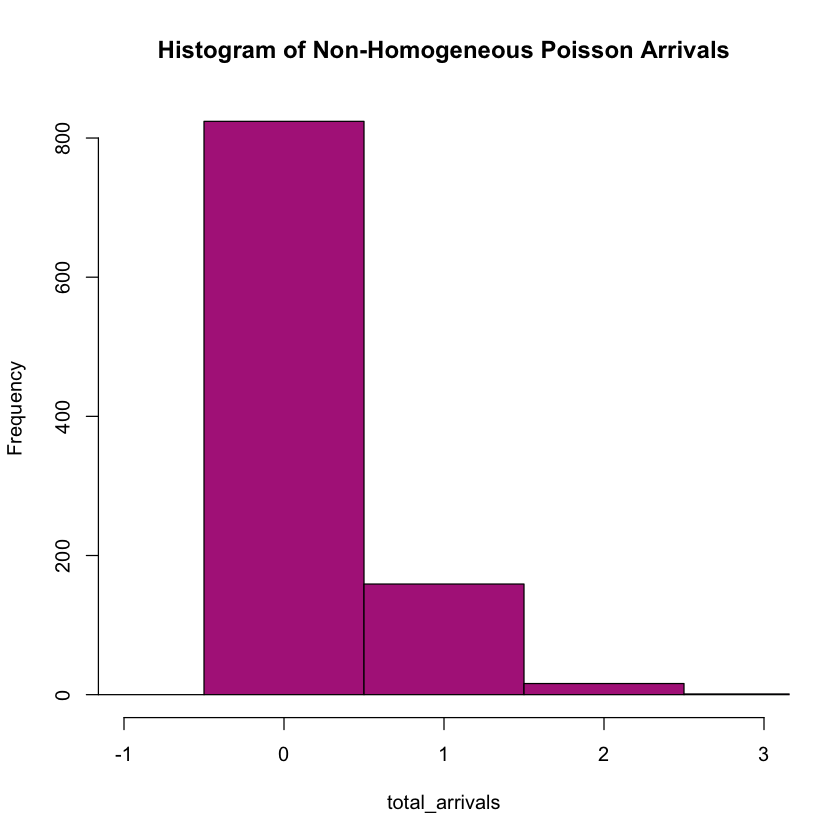

In [1023]:
total_arrivals <- c()

for (t in 1:1000){
    sample_arrival <- nonhomogeneous_poisson(lambda, 1, 1, 17)
    total_arrivals <- c(total_arrivals, sample_arrival)
    }

hist(total_arrivals, col= hawaiian_lightpurple, , xlim= c(-1,3), breaks=seq(-1.5,3.5,1), main = 'Histogram of Non-Homogeneous Poisson Arrivals')

### Delay Mixture Composition

In [705]:
delay_mixture <- function(){
    
    on_time_prob <- 0.8911 
    carrier_prob <- 0.0608
    weather_prob <- 0.0036
    nas_prob <- 0.0024
    security_prob <- 0.0006
    late_arr_prob <- 0.0327
    canceled_prob <- 0.0078
    diverted_prob <- 0.001

    mixture <- UnivarMixingDistribution(Norm(mean=-5, sd=2), Norm(mean=15, sd=3),
                                        Norm(mean=10, sd=6), Norm(mean=12, sd=8),
                                        Norm(mean=25, sd=5), Norm(mean=5, sd=1),
                                        Norm(mean=18, sd=2), Norm(mean=45, sd=10),
                                    mixCoeff=c(on_time_prob, carrier_prob, weather_prob, nas_prob, 
                                    security_prob, late_arr_prob, canceled_prob, diverted_prob))
  
    return (mixture)
    }


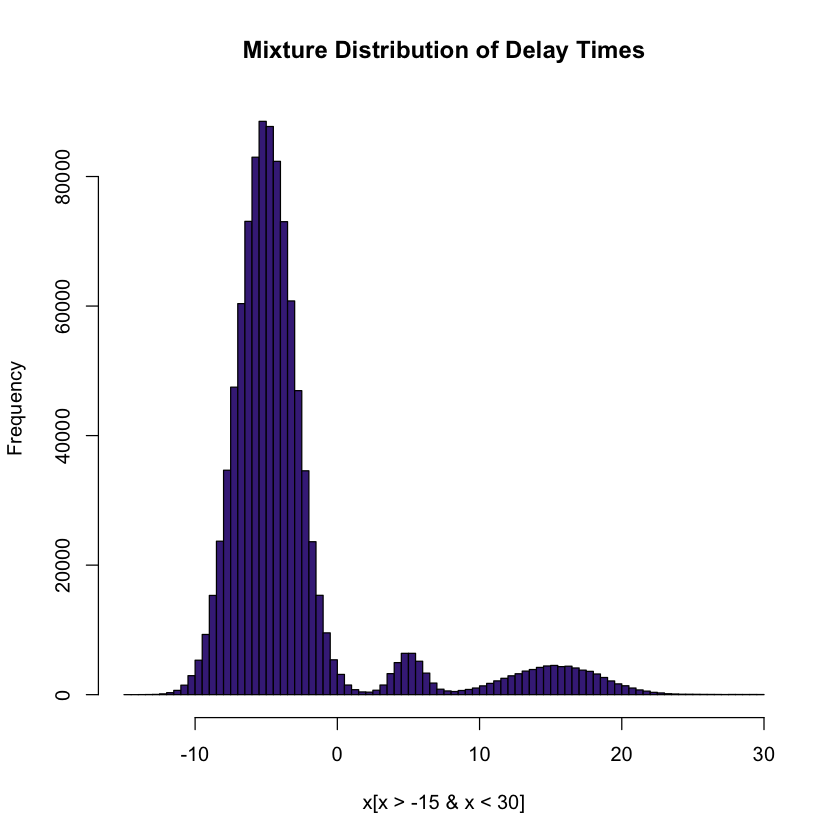

In [529]:
# call distr function r()
mixture <- delay_mixture()
mixture <- r(mixture)

# sample mixture 1,000,000 times    
x <- mixture(1e6)
hist(x[x>-15 & x<30], breaks=150, col=hawaiian_darkpurple, main="Mixture Distribution of Delay Times")

In [370]:
mixture(1)

[1] -4.690819

### Overbooking Strategy

In [371]:
simple_overbooking <- function(last, main_unfilled, overbooked){    
    
    # only overbook if it's not the last flight that day                                                     
    if ((last != TRUE) & (main_unfilled == 0)){                    
        num_overbooked = overbooked                               
        }
    # keep track of overnight                                              
    else{
        num_overbooked = 0
        
        }
    return (num_overbooked)
    }

In [372]:
midday_overbooking <- function(last, main_unfilled, hour, overbooked, cuttoff){    
    
    # only overbook if it's not the last flight that day                                                     
    if ((last != TRUE) & (main_unfilled == 0) & (hour < cutoff)){                    
        num_overbooked = overbooked                               
        }
    # keep track of overnight                                              
    else{
        num_overbooked = 0
        
        }
    return (num_overbooked)
    }

In [373]:
decreasing_overbooking <- function(last, main_unfilled, hour, overbooking_strategy){
    
    # only overbook if it's not the last flight that day                                                 
    if ((last != TRUE) & (main_unfilled == 0)){                    
        
        am_num <- overbooking_strategy[1]
        mid_num <- overbooking_strategy[1]
        pm_num <- overbooking_strategy[1]
        eve_num <- overbooking_strategy[1]
        
        if (hour > 19){num_overbooked = eve_num} 
        else if (hour > 15){num_overbooked = pm_num} 
        else if (hour > 10){num_overbooked = mid_num} 
        else {num_overbooked = am_num}
                                  
        }
                                         
    else{
        num_overbooked = 0
        
        }
    return (num_overbooked)
    
    
}

### FIFO Boarding, Queue, and Upgrade Processes

In [706]:

board <- function(main_to_board, queue, fed_marshall, main_seats){
    
    boarding <- c(fed_marshall, queue)
    count <- sum(boarding)

        for(i in 1:length(main_to_board)){
            boarding <- c(boarding, main_to_board[i])
            count = count + main_to_board[i]
            if (count > main_seats){break}
            }
    
    rm_idx <- which.max(boarding == (sum(boarding) - main_seats))
    boarding <- boarding[-rm_idx]
    boarding <- boarding[boarding != 0]
       
    return (boarding)
     
}

In [375]:


make_queue <- function(df, dept, dest, hour, last, queue_groups){
    
    if (last != TRUE){
        
        if ((length(queue_groups)!= 0)){
            
    queue_groups <- list(queue_groups)        
            
    next_flight <- head(df[which.max((df['DEPT'] == dept) & ( df['DEST'] == dest) & (df['HOUR'] > hour)), ], 1)

    next_flight_num <- unlist(next_flight['FLIGHT_NUM'])

    df$QUEUE[df['FLIGHT_NUM'] == next_flight_num] <-  queue_groups

        }
    } 

    return (df)
    
}

In [377]:

upgrade <- function(num_unfilled, queue){

    upgraded <- c()
    num_queue <- sum(queue)
    flag = TRUE
    
    if ((num_unfilled > 0) & (num_queue > 0)){

        while(flag == TRUE){
        
        big <- queue[which.max(queue)]
        small <- queue[which.min(queue)]
        
            if(num_unfilled %in% queue){
                upgraded <- c(upgraded, num_unfilled)            
                queue <- queue[-which(queue == num_unfilled)[1]]
                num_unfilled <- 0
                }
            else if((big <= num_unfilled) && (length(big) > 0)){
                upgraded <- c(upgraded, big)
                num_unfilled <- num_unfilled - big
                queue <- queue[-which.max(queue)]
                }
            else if((small <= num_unfilled) && (length(small) > 0)){
                upgraded <- c(upgraded, small)
                num_unfilled <- num_unfilled - small
                queue <- queue[-which.min(queue)]
                }
            else{flag <- FALSE
                }
            } 
    }
    else{return (0)
        }
    return (upgraded)
}



### Flight Voucher and Hotel Cost

In [467]:
voucher_cost <- function(overflow, plane, last){
    
    cost <- c(0)
    if (last != TRUE){
        for (over_group in overflow){
            c <- sample(1, x = c(main_rev(over_group, plane), main_rev(over_group, plane) * (2.0)), replace = TRUE, prob = c(0.95,0.05))
            cost <- c(cost, c)
            }
        }
    else {
        for (over_group in overflow){
            c <- main_rev(over_group, plane) * (4.0)
            cost <- c(cost, c)
        }  
    }    

    return (sum(cost))
}



In [376]:
hotel_rooms <- function(last, q){

    num_rooms <- 0
    
    if (last == TRUE){
        
        hotel_groups <- q
        
        for (g in hotel_groups){
            
            if((is.numeric(g)) & (length(g)!= 0)){
            
            if ((g > 0) & (g <= 2)){
                rooms <- sample(1:2, 1)
                num_rooms <- num_rooms + rooms
            }
            else if ((g > 2) & (g <= 4)){
                rooms <- sample(1:4, 1)
                num_rooms <- num_rooms + rooms
            }
            else if ((g > 4) & (g <= 6)){
                rooms <- sample(1:3, 1)
                num_rooms <- num_rooms + rooms
            }
            else if ((g > 6) & (g <= 8)){
                rooms <- sample(1:4, 1)
                num_rooms <- num_rooms + rooms
            }
            else if ((g > 8)){
                rooms <- sample(1:10, 1)
                num_rooms <- num_rooms + rooms
            }
            }
            }
        
        }
    else{num_rooms <- 0}
    
    return (num_rooms)
    
    
    }

### Update Data Frame

In [378]:
update <- function(df){
 
    df$M_SEATS[df['FLIGHT_NUM']==flight_num] = main_seats
    df$OVERBOOKED[df['FLIGHT_NUM']==flight_num] = num_overbooked
    df$BOOKED[df['FLIGHT_NUM']==flight_num] = sum(main_booked)
    df$SHOWED[df['FLIGHT_NUM']==flight_num] = sum(main_showed)
    df$M_UNF[df['FLIGHT_NUM']==flight_num] = main_unfilled_preboard
    df$E_UNF[df['FLIGHT_NUM']==flight_num] = exc_unfilled_preboard
    df$UPGRADED[df['FLIGHT_NUM']==flight_num] = sum(upgraded_main)
    df$MAIN_NO_UP[df['FLIGHT_NUM']==flight_num] = sum(main_no_upgrade)
    df$OVERFLOW[df['FLIGHT_NUM']==flight_num] = list(c(overflow))
    df$BOARD[df['FLIGHT_NUM']==flight_num] = sum(boarding)
    df$DELAY[df['FLIGHT_NUM']==flight_num] = round(delay, 2)
    df$TAKEOFF[df['FLIGHT_NUM']==flight_num] = round(hour, 2)
    
    return (df)
    
}

### Load Real Flight Data

In [1073]:


HNL <- read_excel("/Users/sambrady/OMSA/ISYE 6644 | Simulation/Mini Project 2/Flights.xlsx", sheet = "HNL", col_names = TRUE)
OGG <- read_excel("/Users/sambrady/OMSA/ISYE 6644 | Simulation/Mini Project 2/Flights.xlsx", sheet = "OGG", col_names = TRUE)
ITO <- read_excel("/Users/sambrady/OMSA/ISYE 6644 | Simulation/Mini Project 2/Flights.xlsx", sheet = "ITO", col_names = TRUE)
KOA <- read_excel("/Users/sambrady/OMSA/ISYE 6644 | Simulation/Mini Project 2/Flights.xlsx", sheet = "KOA", col_names = TRUE)
LIH <- read_excel("/Users/sambrady/OMSA/ISYE 6644 | Simulation/Mini Project 2/Flights.xlsx", sheet = "LIH", col_names = TRUE)

data <- list(HNL, OGG, ITO, KOA, LIH)


In [1074]:
head(HNL)

FLIGHT_NUM,DEPT,DEST,TIME,HOUR,PLANE,LAST
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
HAL106,HNL,OGG,3/31/2021 5:40AM HST,5.67,B712,FALSE
HAL108,HNL,KOA,3/31/2021 5:40AM HST,5.67,B712,FALSE
HAL102,HNL,ITO,3/31/2021 5:43AM HST,5.72,B712,FALSE
HAL153,HNL,LIH,3/31/2021 6:07AM HST,6.12,B712,FALSE
HAL136,HNL,OGG,3/31/2021 7:12AM HST,7.20,B712,FALSE
HAL142,HNL,ITO,3/31/2021 7:47AM HST,7.78,B712,FALSE


### Overbooking Strategy Simulation 1) Constant Overbooking Number Thoughout the Day

In [1075]:

revenue <- data.frame()
rooms <- data.frame()
room_cost <- data.frame()

n_sims <- 100                
n_over <- 10

for (sim in 1:n_sims) {       
    
    total_revenue <- c()
    total_num_rooms <- c()
    total_room_cost <- c()

for (o in 0:n_over){       
    
    overbooked <- o  

    total_revenue_all = 0.0    
    total_num_rooms_all = 0
    total_room_cost_all = 0.0
 
     
for (airport in data) {            
    
    total_revenue_airport = 0.0
    total_num_rooms_airport = 0
    total_room_cost_airport = 0.0
    
    airport <- data.frame(airport)
    
    airport['QUEUE'] <- 0
    class(airport$QUEUE) <- "list"
    airport['M_SEATS'] <- 0
    airport['OVERBOOKED'] <- 0
    airport['BOOKED'] <- 0
    airport['SHOWED'] <- 0
    airport['M_UNF'] <- 0
    airport['E_UNF'] <- 0
    airport['UPGRADED'] <- 0
    airport['MAIN_NO_UP'] <- 0
    airport['OVERFLOW'] <- 0
    class(airport$OVERFLOW) <- "list"
    airport['BOARD'] <- 0
    airport['DELAY'] <- 0
    airport['TAKEOFF'] <- 0
    
for (f in 1:nrow(airport)){                              
    
    # gather variables for each flight
    flight <- airport[f, ]                                
    dest <- flight[['DEST']]
    dept <- flight[['DEPT']]
    hour <- flight[['HOUR']]
    plane <- flight[['PLANE']]
    last <- flight[['LAST']]
    flight_num <- unlist(flight[['FLIGHT_NUM']])
    queue <- unlist(flight[['QUEUE']])

    # calculate the maximum number of seats for each seat class of the plane
    main_seats <- max_seats_main(plane)
    exc_seats <- max_seats_exc(plane)
    
    # estimate the rate of unsold seats per hour of the day and seat class                             
    m_empty <- main_empty_rate(hour)
    e_empty <- exc_empty_rate(hour)
    
    # estimate the number of seats sold and group sizes of parties per hour of the day and seat class
    main_booked <- fill_seats(main_seats, hour, m_empty)
    exc_booked <- fill_seats(exc_seats, hour, e_empty)
    
    # calculate total number of empty seats pre overbooking
    main_unfilled <- (main_seats - sum(main_booked))
    exc_unfilled <- (exc_seats - sum(exc_booked))
    total_seats_unfilled <-  (main_unfilled + exc_unfilled)
     
    num_overbooked <- simple_overbooking(last, main_unfilled, overbooked)
    
    # estimate overbooked group sizes 
    overbook_seats <- fill_seats(num_overbooked, hour, 0)                            
    n <- (num_overbooked - sum(overbook_seats))
    if (n >= 0){num = n} else {num = numeric(0)}
    overbook_seats <- c(overbook_seats, num)                                          
    
    # concat main booked and overbooked
    main_booked <- c(main_booked, overbook_seats)
    
    # monte carlo estimate groups canceling
    main_showed <- groups_cancel(main_booked, vals, main_cond_probs)
    exc_showed <- groups_cancel(exc_booked, vals, exc_cond_probs)           
    
    # calculate total number of empty seats pre boarding
    main_unfilled_preboard <- (main_seats - sum(main_showed))
    exc_unfilled_preboard <- (exc_seats - sum(exc_showed))
    total_seats_unfilled_preboard <- (main_unfilled_preboard + exc_unfilled_preboard)    

    # upgrade groups in queue first, then main overflow second to extra comfort
    if (exc_unfilled_preboard != 0){
    upgraded <- upgrade(exc_unfilled_preboard, queue)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded)
    upgraded_main <- upgrade(exc_unfilled_preboard, main_showed)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded_main)
    queue <- vsetdiff(queue, upgraded, multiple=TRUE)
    main_no_upgrade <- vsetdiff(main_showed, upgraded_main, multiple=TRUE)
    }
    else {
    upgraded <- 0
    upgraded_main <- 0
    queue <- queue
    main_no_upgrade <- main_showed       
    }
    
    main_and_queue <- c(main_no_upgrade, queue)
    main_and_queue <- main_and_queue[main_and_queue!=0]              
    main_and_queue <- as.numeric(unlist(main_and_queue)) 
    
    fed_marshall <- nonhomogeneous_poisson(lambda, 1, 1, 17)
    
    boarding <- board(main_no_upgrade, queue, fed_marshall, main_seats)
    overflow <- vsetdiff(main_and_queue, boarding, multiple = TRUE)
    
    airport <- make_queue(airport, dept, dest, hour, last, overflow) 
    
    # estimate and add in delay time
    delay <- mixture(1)/60
    hour <- hour + delay
    
    airport <- update(airport)  
    
    # calculate num hotel rooms
    num_rooms <- hotel_rooms(last, queue)
    hotel_cost <- sum(round(rnorm(num_rooms, mean=225, sd=15),2))              

    # calculate revenue                                                         
    main_revenue <- main_rev(main_showed, plane)
    exc_revenue <- exc_rev(exc_showed, plane)                                                 
    vouchers <- voucher_cost(overflow, plane, last)                                                          
    total_revenue_flight <- (sum(main_revenue) + sum(exc_revenue) - sum(vouchers) - sum(hotel_cost))
    
    total_num_rooms_airport <- total_num_rooms_airport + num_rooms
    total_room_cost_airport <- total_room_cost_airport + hotel_cost
    total_revenue_airport <- total_revenue_flight + total_revenue_airport
}
    total_num_rooms_all <- total_num_rooms_all + total_num_rooms_airport
    total_room_cost_all <- total_room_cost_all + total_room_cost_airport
    total_revenue_all <- total_revenue_all + total_revenue_airport
}
    total_num_rooms <- c(total_num_rooms, total_num_rooms_all)
    total_room_cost <- c(total_room_cost, total_room_cost_all)
    total_revenue <- c(total_revenue, total_revenue_all)
}
    rooms <- rbind(rooms,total_num_rooms)
    room_cost <- rbind(room_cost,total_room_cost)
    revenue <- rbind(revenue,total_revenue)
}


In [1076]:
head(airport)

,FLIGHT_NUM,DEPT,DEST,TIME,HOUR,PLANE,LAST,QUEUE,M_SEATS,OVERBOOKED,BOOKED,SHOWED,M_UNF,E_UNF,UPGRADED,MAIN_NO_UP,OVERFLOW,BOARD,DELAY,TAKEOFF
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<dbl>,<dbl>,<dbl>
1,HAL154,LIH,HNL,3/31/2021 7:09AM HST,7.15,B712,FALSE,0,120,0,117,102,18,0,0,102,,102,-0.11,7.04
2,HAL224,LIH,HNL,3/31/2021 10:50AM HST,10.83,B712,FALSE,0,120,10,130,130,-10,0,0,130,"1, 4, 3, 2",120,-0.11,10.72
3,HAL284,LIH,HNL,3/31/2021 1:50PM HST,13.83,B712,FALSE,"1, 4, 3, 2",120,10,130,114,6,0,0,114,4,120,0.34,14.17
4,HAL324,LIH,HNL,3/31/2021 4:15PM HST,16.25,B712,FALSE,4,120,10,130,119,1,0,0,119,3,120,-0.10,16.15
5,HAL514,LIH,HNL,3/31/2021 7:10PM HST,19.17,B712,TRUE,3,120,0,118,113,7,0,0,113,,116,-0.08,19.09


In [1028]:
colnames(revenue) = c(0:n_over)
revenue <- cbind(1:n_sims, revenue)
colnames(revenue)[1] = 'sim'
head(revenue)
long <- melt(revenue, id.var = "sim")
head(long, 10)

,sim,0,1,2,3,4,5,6,7,8,9,10
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1687423,1702264,1691987,1696612,1697456,1697635,1647634,1645379,1615900,1580661,1526445
2,2,1683372,1688317,1688369,1693772,1701689,1685847,1682976,1628297,1609388,1545669,1501764
3,3,1685569,1683043,1687726,1693154,1698776,1678602,1669973,1679558,1631244,1592732,1531624
4,4,1676860,1690291,1690103,1705379,1686521,1683124,1676332,1662344,1633185,1602274,1549482
5,5,1680734,1683150,1704002,1689522,1681438,1700456,1673779,1635627,1636303,1595687,1553869
6,6,1677241,1688915,1699220,1703124,1695897,1681564,1671352,1655556,1657800,1613158,1549780


,sim,variable,value
,<int>,<fct>,<dbl>
1,1,0,1687423
2,2,0,1683372
3,3,0,1685569
4,4,0,1676860
5,5,0,1680734
6,6,0,1677241
7,7,0,1671995
8,8,0,1685223
9,9,0,1685685


In [1029]:
mean1 <- revenue[which.max(colMeans(revenue))]

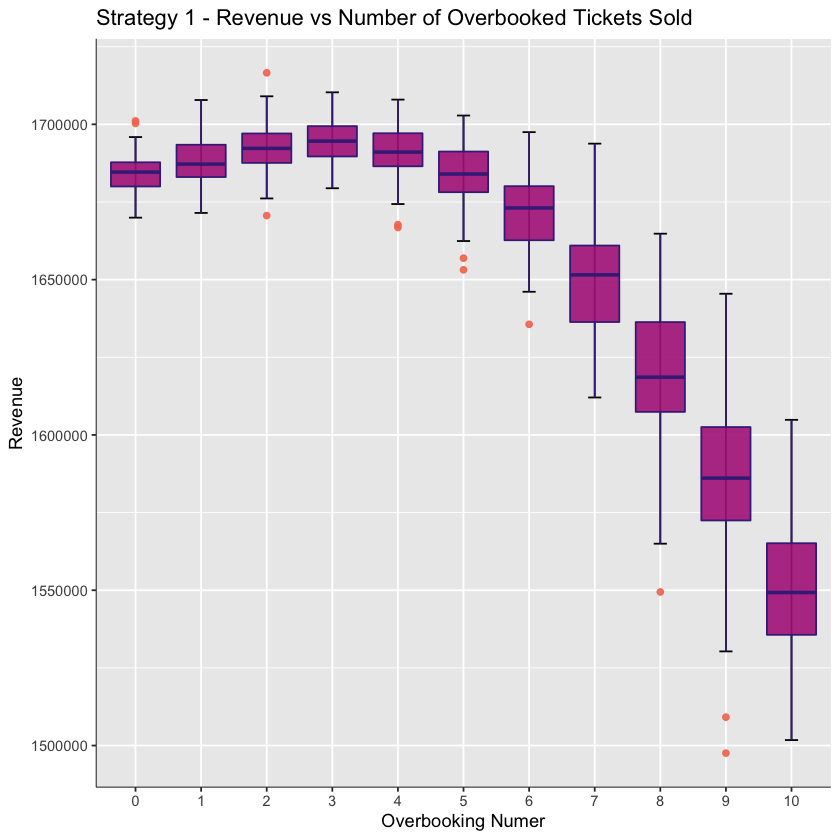

In [1033]:
ggplot(data = long , aes(x=variable ,y=value)) +
       stat_boxplot(geom = "errorbar", width = 0.2) +
       geom_boxplot(fill = hawaiian_lightpurple, colour = hawaiian_darkpurple, alpha = 0.9, outlier.colour =hawaiian_pink ) +
       scale_y_continuous(name = "Revenue") +  # Continuous variable label
       scale_x_discrete(name = "Overbooking Numer") +      # Group label
       ggtitle("Strategy 1 - Revenue vs Number of Overbooked Tickets Sold") + # Plot title
       theme(axis.line = element_line(colour = "black", size = 0.25))

In [1034]:
colnames(rooms) = c(0:n_over)
avg_rooms <- round(colMeans(rooms))
avg_rooms <- data.frame(avg_rooms)
avg_rooms <- cbind(0:n_over, avg_rooms)
avg_room_cost <- round(colMeans(room_cost))
avg_rooms <- cbind(avg_rooms, avg_room_cost)
colnames(avg_rooms)[1] = 'over'
colnames(avg_rooms)[3] = 'avg_total_room_cost'
avg_rooms

,over,avg_rooms,avg_total_room_cost
,<int>,<dbl>,<dbl>
0,0,0,0
1,1,1,164
2,2,3,654
3,3,7,1649
4,4,14,3159
5,5,24,5419
6,6,39,8874
7,7,62,13922
8,8,86,19353


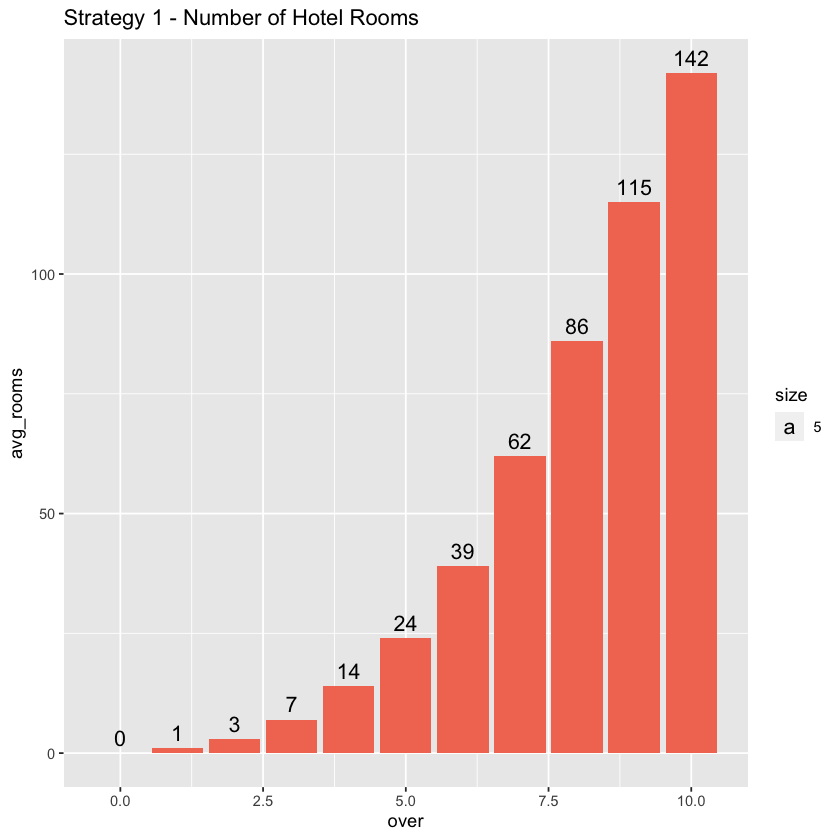

In [1037]:
ggplot(data = avg_rooms, aes(x = over ,y = avg_rooms)) +
    geom_col(fill = hawaiian_pink) +  
       ggtitle("Strategy 1 - Number of Hotel Rooms") +
    geom_text(aes(label = avg_rooms, vjust = -0.5, size = 5 ))

### Overbooking Strategy 2) Constant Overbooking Number until Mid-Day

In [1038]:

revenue <- data.frame()
rooms <- data.frame()
room_cost <- data.frame()

n_sims <- 100                
n_over <- 10

for (sim in 1:n_sims) {       
    
    total_revenue <- c()
    total_num_rooms <- c()
    total_room_cost <- c()

for (o in 0:n_over){       
    
    overbooked <- o  

    total_revenue_all = 0.0    
    total_num_rooms_all = 0
    total_room_cost_all = 0.0
 
     
for (airport in data) {           
    
    total_revenue_airport = 0.0
    total_num_rooms_airport = 0
    total_room_cost_airport = 0.0
    
    airport <- data.frame(airport)
    
    airport['QUEUE'] <- 0
    class(airport$QUEUE) <- "list"
    airport['M_SEATS'] <- 0
    airport['OVERBOOKED'] <- 0
    airport['BOOKED'] <- 0
    airport['SHOWED'] <- 0
    airport['M_UNF'] <- 0
    airport['E_UNF'] <- 0
    airport['UPGRADED'] <- 0
    airport['MAIN_NO_UP'] <- 0
    airport['OVERFLOW'] <- 0
    class(airport$OVERFLOW) <- "list"
    airport['BOARD'] <- 0
    airport['DELAY'] <- 0
    airport['TAKEOFF'] <- 0
    
for (f in 1:nrow(airport)){                              
    
    # gather variables for each flight
    flight <- airport[f, ]                                
    dest <- flight[['DEST']]
    dept <- flight[['DEPT']]
    hour <- flight[['HOUR']]
    plane <- flight[['PLANE']]
    last <- flight[['LAST']]
    flight_num <- unlist(flight[['FLIGHT_NUM']])
    queue <- unlist(flight[['QUEUE']])

    # calculate the maximum number of seats for each seat class of the plane
    main_seats <- max_seats_main(plane)
    exc_seats <- max_seats_exc(plane)
    
    # estimate the rate of unsold seats per hour of the day and seat class                            
    m_empty <- main_empty_rate(hour)
    e_empty <- exc_empty_rate(hour)
    
    # estimate the number of seats sold and group sizes of parties per hour of the day and seat class
    main_booked <- fill_seats(main_seats, hour, m_empty)
    exc_booked <- fill_seats(exc_seats, hour, e_empty)
    
    # calculate total number of empty seats pre overbooking
    main_unfilled <- (main_seats - sum(main_booked))
    exc_unfilled <- (exc_seats - sum(exc_booked))
    total_seats_unfilled <-  (main_unfilled + exc_unfilled)
     
    cutoff <- 12
    num_overbooked <- midday_overbooking(last, main_unfilled, hour, overbooked, cutoff)
    
    # estimate overbooked group sizes 
    overbook_seats <- fill_seats(num_overbooked, hour, 0)                            
    n <- (num_overbooked - sum(overbook_seats))
    if (n >= 0){num = n} else {num = numeric(0)}
    overbook_seats <- c(overbook_seats, num)                                          
    
    # concat main booked and overbooked
    main_booked <- c(main_booked, overbook_seats)
    
    # monte carlo estimate groups canceling
    main_showed <- groups_cancel(main_booked, vals, main_cond_probs)
    exc_showed <- groups_cancel(exc_booked, vals, exc_cond_probs)           
    
    # calculate total number of empty seats pre boarding
    main_unfilled_preboard <- (main_seats - sum(main_showed))
    exc_unfilled_preboard <- (exc_seats - sum(exc_showed))
    total_seats_unfilled_preboard <- (main_unfilled_preboard + exc_unfilled_preboard)    

    # upgrade groups in queue first, then main overflow second to extra comfort
    if (exc_unfilled_preboard != 0){
    upgraded <- upgrade(exc_unfilled_preboard, queue)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded)
    upgraded_main <- upgrade(exc_unfilled_preboard, main_showed)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded_main)
    queue <- vsetdiff(queue, upgraded, multiple=TRUE)
    main_no_upgrade <- vsetdiff(main_showed, upgraded_main, multiple=TRUE)
    }
    else {
    upgraded <- 0
    upgraded_main <- 0
    queue <- queue
    main_no_upgrade <- main_showed       
    }

    main_and_queue <- c(main_no_upgrade, queue)
    main_and_queue <- main_and_queue[main_and_queue!=0]              
    main_and_queue <- as.numeric(unlist(main_and_queue)) 
    
    fed_marshall <- nonhomogeneous_poisson(lambda, 1, 1, 17)
    
    boarding <- board(main_no_upgrade, queue, fed_marshall, main_seats)
    overflow <- vsetdiff(main_and_queue, boarding, multiple = TRUE)

    airport <- make_queue(airport, dept, dest, hour, last, overflow) 
    
    # estimate and add in delay time
    delay <- mixture(1)/60
    hour <- hour + delay
    
    airport <- update(airport)  
    
    # calculate num hotel rooms
    num_rooms <- hotel_rooms(last, queue)
    hotel_cost <- sum(round(rnorm(num_rooms, mean=225, sd=15),2))              

    # calculate revenue                                                        
    main_revenue <- main_rev(main_showed, plane)
    exc_revenue <- exc_rev(exc_showed, plane)                                                 
    vouchers <- voucher_cost(overflow, plane, last)                                                          
    total_revenue_flight <- (sum(main_revenue) + sum(exc_revenue) - sum(vouchers) - sum(hotel_cost))
    
    total_num_rooms_airport <- total_num_rooms_airport + num_rooms
    total_room_cost_airport <- total_room_cost_airport + hotel_cost
    total_revenue_airport <- total_revenue_flight + total_revenue_airport
}
    total_num_rooms_all <- total_num_rooms_all + total_num_rooms_airport
    total_room_cost_all <- total_room_cost_all + total_room_cost_airport
    total_revenue_all <- total_revenue_all + total_revenue_airport
}
    total_num_rooms <- c(total_num_rooms, total_num_rooms_all)
    total_room_cost <- c(total_room_cost, total_room_cost_all)
    total_revenue <- c(total_revenue, total_revenue_all)
}
    rooms <- rbind(rooms,total_num_rooms)
    room_cost <- rbind(room_cost,total_room_cost)
    revenue <- rbind(revenue,total_revenue)
}



In [1039]:
head(airport)

,FLIGHT_NUM,DEPT,DEST,TIME,HOUR,PLANE,LAST,QUEUE,M_SEATS,OVERBOOKED,BOOKED,SHOWED,M_UNF,E_UNF,UPGRADED,MAIN_NO_UP,OVERFLOW,BOARD,DELAY,TAKEOFF
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<dbl>,<dbl>,<dbl>
1,HAL154,LIH,HNL,3/31/2021 7:09AM HST,7.15,B712,FALSE,0,120,10,130,124,-4,0,0,124,"1, 2, 1",120,-0.12,7.03
2,HAL224,LIH,HNL,3/31/2021 10:50AM HST,10.83,B712,FALSE,"1, 2, 1",120,10,130,128,-8,0,0,128,"3, 5, 1, 2, 1",120,-0.06,10.77
3,HAL284,LIH,HNL,3/31/2021 1:50PM HST,13.83,B712,FALSE,"3, 5, 1, 2, 1",120,0,120,118,2,0,0,118,"2, 4, 3, 2",120,-0.07,13.76
4,HAL324,LIH,HNL,3/31/2021 4:15PM HST,16.25,B712,FALSE,"2, 4, 3, 2",120,0,120,120,0,0,0,120,"7, 1, 3",120,-0.06,16.19
5,HAL514,LIH,HNL,3/31/2021 7:10PM HST,19.17,B712,TRUE,"7, 1, 3",120,0,120,116,4,0,0,116,"2, 1, 1, 3",120,-0.13,19.04


In [1040]:
colnames(revenue) = c(0:n_over)
revenue <- cbind(1:n_sims, revenue)
colnames(revenue)[1] = 'sim'
head(revenue)
long <- melt(revenue, id.var = "sim")
head(long, 10)

,sim,0,1,2,3,4,5,6,7,8,9,10
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1678444,1695692,1689618,1696108,1675653,1700040,1688729,1687344,1666789,1679427,1666980
2,2,1694207,1677831,1691125,1708586,1681542,1688417,1683028,1685754,1679040,1677643,1682746
3,3,1679209,1690291,1690783,1705795,1701089,1704410,1694700,1686750,1683256,1671441,1654929
4,4,1685777,1694047,1689437,1697956,1691578,1695140,1687981,1692826,1695609,1684269,1668892
5,5,1680534,1692318,1694460,1685163,1693015,1700235,1704588,1679046,1677728,1690122,1675482
6,6,1671816,1685158,1680383,1681694,1692139,1687725,1678566,1701821,1666269,1679757,1676881


,sim,variable,value
,<int>,<fct>,<dbl>
1,1,0,1678444
2,2,0,1694207
3,3,0,1679209
4,4,0,1685777
5,5,0,1680534
6,6,0,1671816
7,7,0,1673236
8,8,0,1687760
9,9,0,1684552


In [823]:
mean2 <- revenue[which.max(colMeans(revenue))]

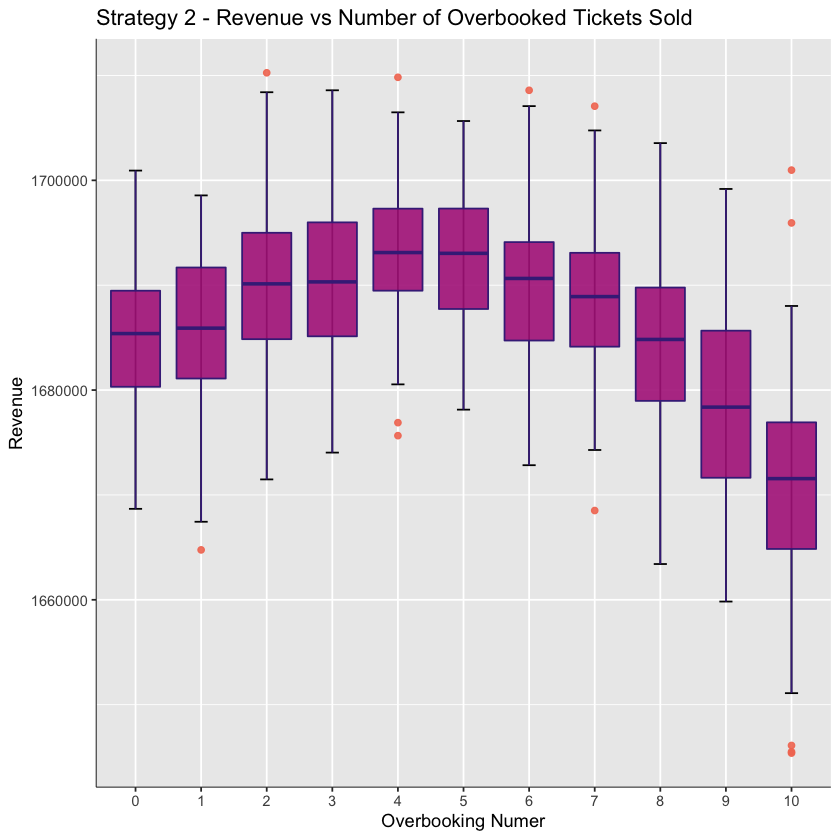

In [1041]:
ggplot(data = long , aes(x=variable ,y=value)) +
       stat_boxplot(geom = "errorbar", width = 0.2) +
       geom_boxplot(fill = hawaiian_lightpurple, colour = hawaiian_darkpurple, alpha = 0.9, outlier.colour =hawaiian_pink ) +
       scale_y_continuous(name = "Revenue") +  # Continuous variable label
       scale_x_discrete(name = "Overbooking Numer") +      # Group label
       ggtitle("Strategy 2 - Revenue vs Number of Overbooked Tickets Sold") + # Plot title
       theme(axis.line = element_line(colour = "black", size = 0.25))

In [1042]:
colnames(rooms) = c(0:n_over)
avg_rooms <- round(colMeans(rooms))
avg_rooms <- data.frame(avg_rooms)
avg_rooms <- cbind(0:n_over, avg_rooms)
avg_room_cost <- round(colMeans(room_cost))
avg_rooms <- cbind(avg_rooms, avg_room_cost)
colnames(avg_rooms)[1] = 'over'
colnames(avg_rooms)[3] = 'avg_total_room_cost'
avg_rooms

,over,avg_rooms,avg_total_room_cost
,<int>,<dbl>,<dbl>
0,0,0,16
1,1,0,6
2,2,0,5
3,3,0,23
4,4,0,25
5,5,0,75
6,6,1,174
7,7,1,284
8,8,3,711


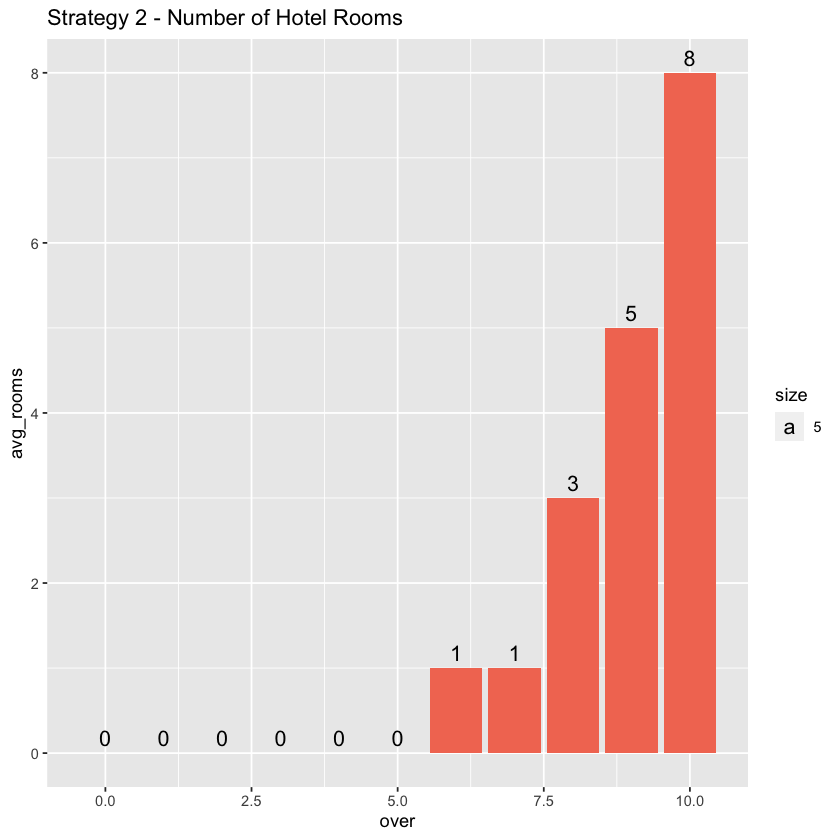

In [1043]:
ggplot(data = avg_rooms, aes(x = over ,y = avg_rooms)) +
    geom_col(fill = hawaiian_pink) + 
       ggtitle("Strategy 2 - Number of Hotel Rooms") +
    geom_text(aes(label = avg_rooms, vjust = -0.5, size = 5 ))

### Overbooking Strategy 3) Various Decreasing Overbooking Number Thoughout the Day

In [1044]:

revenue <- data.frame()
rooms <- data.frame()
room_cost <- data.frame()

n_sims <- 100   
strategy_list <- list(A = c(6, 0, 0, 0), B = c(6, 4, 2, 0), C = c(4, 2, 1, 0), D = c(6, 3, 0, 0), E = c(4, 2, 0, 0), F = c(6, 2, 1, 0), G = c(0, 0, 0, 0), H = c(5, 3, 1, 1), I = c(5, 2, 1, 0))

for (sim in 1:n_sims) {       
    
    total_revenue <- c()
    total_num_rooms <- c()
    total_room_cost <- c()

for (strategy in strategy_list){       
    
    s <- strategy  

    total_revenue_all = 0.0    
    total_num_rooms_all = 0
    total_room_cost_all = 0.0
 
     
for (airport in data) {           
    
    total_revenue_airport = 0.0
    total_num_rooms_airport = 0
    total_room_cost_airport = 0.0
    
    airport <- data.frame(airport)
    
    airport['QUEUE'] <- 0
    class(airport$QUEUE) <- "list"
    airport['M_SEATS'] <- 0
    airport['OVERBOOKED'] <- 0
    airport['BOOKED'] <- 0
    airport['SHOWED'] <- 0
    airport['M_UNF'] <- 0
    airport['E_UNF'] <- 0
    airport['UPGRADED'] <- 0
    airport['MAIN_NO_UP'] <- 0
    airport['OVERFLOW'] <- 0
    class(airport$OVERFLOW) <- "list"
    airport['BOARD'] <- 0
    airport['DELAY'] <- 0
    airport['TAKEOFF'] <- 0
    
for (f in 1:nrow(airport)){                              
    
    # gather variables for each flight
    flight <- airport[f, ]                                
    dest <- flight[['DEST']]
    dept <- flight[['DEPT']]
    hour <- flight[['HOUR']]
    plane <- flight[['PLANE']]
    last <- flight[['LAST']]
    flight_num <- unlist(flight[['FLIGHT_NUM']])
    queue <- unlist(flight[['QUEUE']])

    # calculate the maximum number of seats for each seat class of the plane
    main_seats <- max_seats_main(plane)
    exc_seats <- max_seats_exc(plane)
    
    # estimate the rate of unsold seats per hour of the day and seat class                             
    m_empty <- main_empty_rate(hour)
    e_empty <- exc_empty_rate(hour)
    
    # estimate the number of seats sold and group sizes of parties per hour of the day and seat class
    main_booked <- fill_seats(main_seats, hour, m_empty)
    exc_booked <- fill_seats(exc_seats, hour, e_empty)
    
    # calculate total number of empty seats pre overbooking
    main_unfilled <- (main_seats - sum(main_booked))
    exc_unfilled <- (exc_seats - sum(exc_booked))
    total_seats_unfilled <-  (main_unfilled + exc_unfilled)
     
    num_overbooked <- decreasing_overbooking(last, main_unfilled, hour, s)
    
    # estimate overbooked group sizes 
    overbook_seats <- fill_seats(num_overbooked, hour, 0)                            
    n <- (num_overbooked - sum(overbook_seats))
    if (n >= 0){num = n} else {num = numeric(0)}
    overbook_seats <- c(overbook_seats, num)                                          
    
    # concat main booked and overbooked
    main_booked <- c(main_booked, overbook_seats)
    
    # monte carlo estimate groups canceling
    main_showed <- groups_cancel(main_booked, vals, main_cond_probs)
    exc_showed <- groups_cancel(exc_booked, vals, exc_cond_probs)           
    
    # calculate total number of empty seats pre boarding
    main_unfilled_preboard <- (main_seats - sum(main_showed))
    exc_unfilled_preboard <- (exc_seats - sum(exc_showed))
    total_seats_unfilled_preboard <- (main_unfilled_preboard + exc_unfilled_preboard)    

    # upgrade groups in queue first, then main overflow second to extra comfort
    if (exc_unfilled_preboard != 0){
    upgraded <- upgrade(exc_unfilled_preboard, queue)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded)
    upgraded_main <- upgrade(exc_unfilled_preboard, main_showed)
    exc_unfilled_preboard <- exc_unfilled_preboard - sum(upgraded_main)
    queue <- vsetdiff(queue, upgraded, multiple=TRUE)
    main_no_upgrade <- vsetdiff(main_showed, upgraded_main, multiple=TRUE)
    }
    else {
    upgraded <- 0
    upgraded_main <- 0
    queue <- queue
    main_no_upgrade <- main_showed       
    }

    main_and_queue <- c(main_no_upgrade, queue)
    main_and_queue <- main_and_queue[main_and_queue!=0]              
    main_and_queue <- as.numeric(unlist(main_and_queue)) 
    
    fed_marshall <- nonhomogeneous_poisson(lambda, 1, 1, 17)
    
    boarding <- board(main_no_upgrade, queue, fed_marshall, main_seats)
    overflow <- vsetdiff(main_and_queue, boarding, multiple = TRUE)

    airport <- make_queue(airport, dept, dest, hour, last, overflow) 
    
    # estimate and add in delay time
    delay <- mixture(1)/60
    hour <- hour + delay
    
    airport <- update(airport)  
    
    # calculate num hotel rooms
    num_rooms <- hotel_rooms(last, queue)
    hotel_cost <- sum(round(rnorm(num_rooms, mean=225, sd=15),2))              

    # calculate revenue                                                        
    main_revenue <- main_rev(main_showed, plane)
    exc_revenue <- exc_rev(exc_showed, plane)                                                 
    vouchers <- voucher_cost(overflow, plane, last)                                                          
    total_revenue_flight <- (sum(main_revenue) + sum(exc_revenue) - sum(vouchers) - sum(hotel_cost))
    
    total_num_rooms_airport <- total_num_rooms_airport + num_rooms
    total_room_cost_airport <- total_room_cost_airport + hotel_cost
    total_revenue_airport <- total_revenue_flight + total_revenue_airport
}
    total_num_rooms_all <- total_num_rooms_all + total_num_rooms_airport
    total_room_cost_all <- total_room_cost_all + total_room_cost_airport
    total_revenue_all <- total_revenue_all + total_revenue_airport
}
    total_num_rooms <- c(total_num_rooms, total_num_rooms_all)
    total_room_cost <- c(total_room_cost, total_room_cost_all)
    total_revenue <- c(total_revenue, total_revenue_all)
}
    rooms <- rbind(rooms,total_num_rooms)
    room_cost <- rbind(room_cost,total_room_cost)
    revenue <- rbind(revenue,total_revenue)
}




In [1045]:
head(airport)

,FLIGHT_NUM,DEPT,DEST,TIME,HOUR,PLANE,LAST,QUEUE,M_SEATS,OVERBOOKED,BOOKED,SHOWED,M_UNF,E_UNF,UPGRADED,MAIN_NO_UP,OVERFLOW,BOARD,DELAY,TAKEOFF
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<dbl>,<dbl>,<dbl>
1,HAL154,LIH,HNL,3/31/2021 7:09AM HST,7.15,B712,FALSE,0,120,5,125,120,0,0,0,120,,120,-0.05,7.10
2,HAL224,LIH,HNL,3/31/2021 10:50AM HST,10.83,B712,FALSE,0,120,5,126,120,0,0,0,120,,120,-0.11,10.72
3,HAL284,LIH,HNL,3/31/2021 1:50PM HST,13.83,B712,FALSE,0,120,5,125,124,-4,0,0,124,"1, 3",120,-0.06,13.77
4,HAL324,LIH,HNL,3/31/2021 4:15PM HST,16.25,B712,FALSE,"1, 3",120,5,126,124,-4,0,0,124,"2, 6",120,0.07,16.32
5,HAL514,LIH,HNL,3/31/2021 7:10PM HST,19.17,B712,TRUE,"2, 6",120,0,119,109,11,0,0,109,,117,-0.17,19.00


In [1046]:
colnames(revenue) = c(1:length(strategy_list))
revenue <- cbind(1:n_sims, revenue)
colnames(revenue)[1] = 'sim'
head(revenue)
long <- melt(revenue, id.var = "sim")
head(long, 10)

,sim,1,2,3,4,5,6,7,8,9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1670333,1652210,1673722,1676225,1688679,1661175,1693526,1691084,1676802
2,2,1668252,1648564,1691043,1686569,1695383,1670116,1686620,1688421,1701530
3,3,1690661,1669649,1702786,1659603,1686241,1678537,1689855,1675176,1685206
4,4,1660880,1671479,1681442,1667494,1688779,1693045,1677874,1688254,1676045
5,5,1653050,1663303,1693447,1674753,1699996,1655596,1686741,1682867,1700259
6,6,1653045,1659637,1694899,1670158,1653947,1667331,1678005,1657578,1673416


,sim,variable,value
,<int>,<fct>,<dbl>
1,1,1,1670333
2,2,1,1668252
3,3,1,1690661
4,4,1,1660880
5,5,1,1653050
6,6,1,1653045
7,7,1,1665390
8,8,1,1636993
9,9,1,1664293


In [830]:
mean3 <- revenue[which.max(colMeans(revenue))]

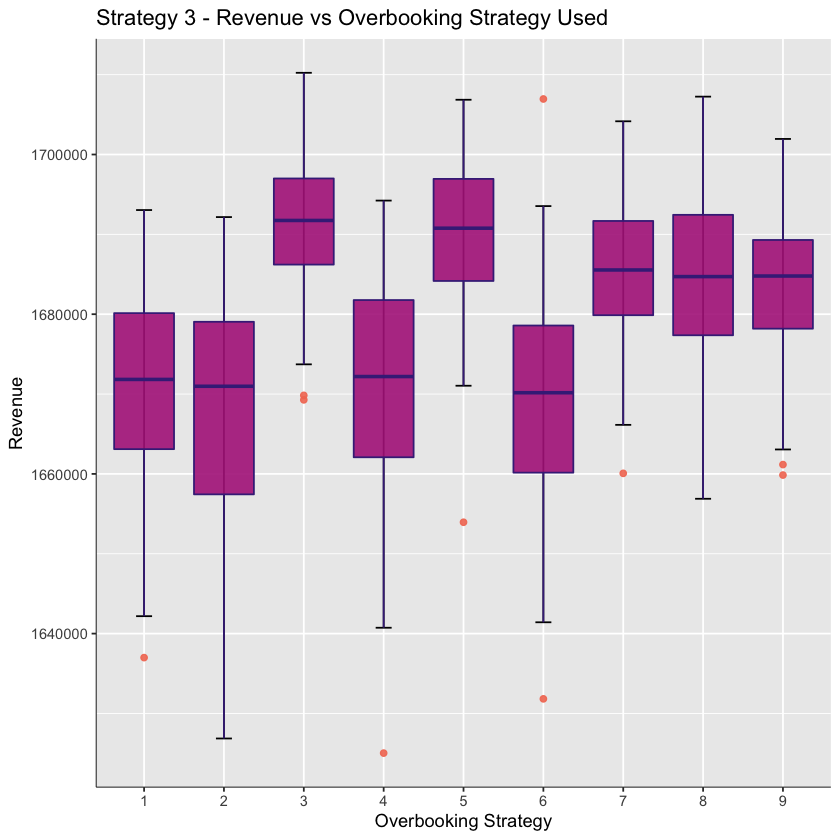

In [1047]:
ggplot(data = long , aes(x=variable ,y=value)) +
       stat_boxplot(geom = "errorbar", width = 0.2) +
       geom_boxplot(fill = hawaiian_lightpurple, colour = hawaiian_darkpurple, alpha = 0.9, outlier.colour =hawaiian_pink ) +
       scale_y_continuous(name = "Revenue") +  # Continuous variable label
       scale_x_discrete(name = "Overbooking Strategy") +      # Group label
       ggtitle("Strategy 3 - Revenue vs Overbooking Strategy Used") + # Plot title
       theme(axis.line = element_line(colour = "black", size = 0.25))

In [1048]:
colnames(rooms) = c(1:length(strategy_list))
avg_rooms <- round(colMeans(rooms))
avg_rooms <- data.frame(avg_rooms)
avg_rooms <- cbind(1:length(strategy_list), avg_rooms)
avg_room_cost <- round(colMeans(room_cost))
avg_rooms <- cbind(avg_rooms, avg_room_cost)
colnames(avg_rooms)[1] = 'over'
colnames(avg_rooms)[3] = 'avg_total_room_cost'
avg_rooms

,over,avg_rooms,avg_total_room_cost
,<int>,<dbl>,<dbl>
1,1,41,9318
2,2,41,9196
3,3,15,3458
4,4,41,9261
5,5,15,3402
6,6,42,9353
7,7,0,2
8,8,25,5521
9,9,24,5315


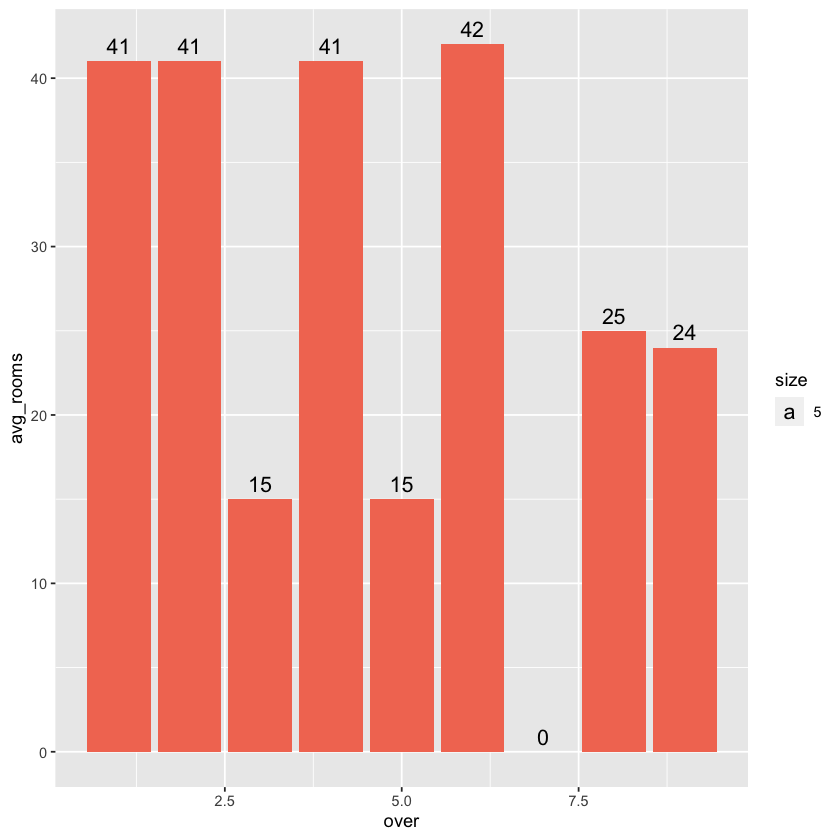

In [1049]:
ggplot(data = avg_rooms, aes(x = over ,y = avg_rooms)) +
    geom_col(fill = hawaiian_pink) + 
    geom_text(aes(label = avg_rooms, vjust = -0.5, size = 5 ))

### Compare Highest Mean from Each Strategy

In [1050]:
means <- cbind(mean1, mean2, mean3)
colnames(means) = c(paste('Strategy 1', as.character(colnames(means)[1]), sep='-'), paste('Strategy 2',as.character(colnames(means)[2]),  sep='-'), paste('Strategy 3', as.character(colnames(means)[3]), sep='-'))
means_long <- melt(means)

No id variables; using all as measure variables



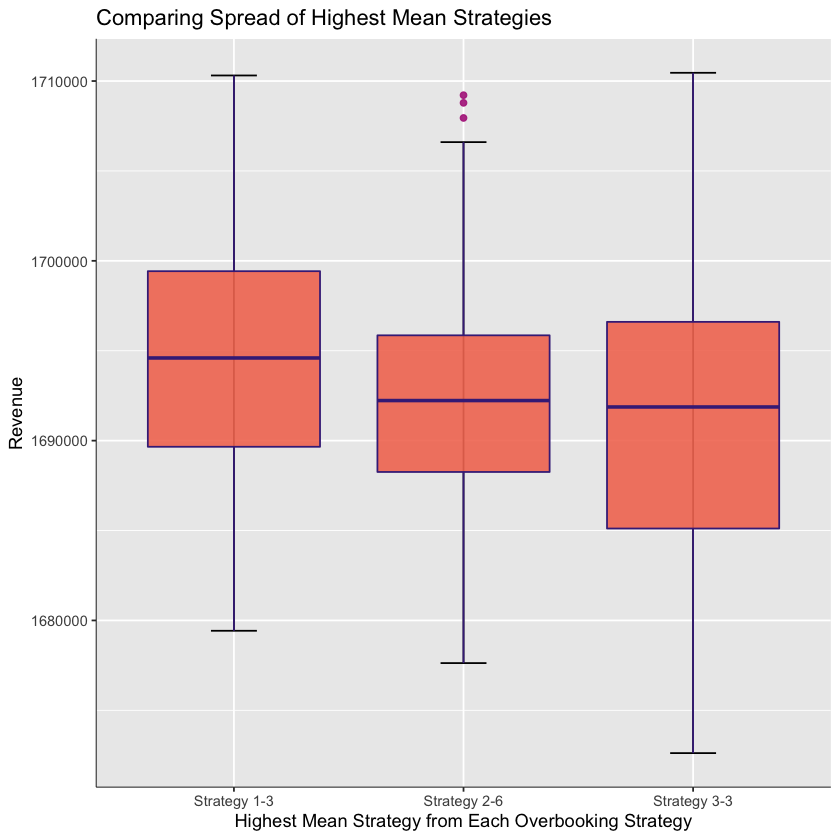

In [1051]:
ggplot(data = means_long , aes(x=variable ,y=value)) +
       stat_boxplot(geom = "errorbar", width = 0.2) +
       geom_boxplot(fill = hawaiian_pink, colour = hawaiian_darkpurple, alpha = 0.9, outlier.colour = hawaiian_lightpurple) +
       scale_y_continuous(name = "Revenue") +  # Continuous variable label
       scale_x_discrete(name = "Highest Mean Strategy from Each Overbooking Strategy") +      # Group label
       ggtitle("Comparing Spread of Highest Mean Strategies") + # Plot title
       theme(axis.line = element_line(colour = "black", size = 0.25))

In [1054]:
max(colMeans(mean1), colMeans(mean2), colMeans(mean3))

[1] 1694630

In [1055]:
colMeans(mean1)

3 
1694630

### Hypothesis Testing the Means

##### Accept Null Hypothesis: Means of Strategy 1 and 3 are equal

In [1056]:
welch_test <- t.test(means[1], means[3], alternative='two.sided')
welch_test


	Welch Two Sample t-test

data:  means[1] and means[3]
t = 3.3224, df = 187.33, p-value = 0.001073
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1379.740 5412.976
sample estimates:
mean of x mean of y 
  1694630   1691234 


##### Accept Alternative Hypothesis: Means of Strategy 1 and 3 are not equal

In [1057]:
welch_test <- t.test(means[1], means[2], alternative='two.sided')
welch_test


	Welch Two Sample t-test

data:  means[1] and means[2]
t = 2.0047, df = 197.4, p-value = 0.04636
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
   29.94948 3649.28592
sample estimates:
mean of x mean of y 
  1694630   1692790 


##### Accept Alternative Hypothesis: Means of Strategy 2 and 3 are not equal

In [1058]:
welch_test <- t.test(means[2], means[3], alternative='two.sided')
welch_test


	Welch Two Sample t-test

data:  means[2] and means[3]
t = 1.4901, df = 191.38, p-value = 0.1378
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -503.9109 3617.3919
sample estimates:
mean of x mean of y 
  1692790   1691234 


### Normality Test

##### Accept Null Hypothesis: The data follows a normal distribution

In [1059]:
shapiro.test(as.numeric(unlist(as.vector(means[1]))))


	Shapiro-Wilk normality test

data:  as.numeric(unlist(as.vector(means[1])))
W = 0.99048, p-value = 0.7031


### 95 % Confidence Intervals for Revenue Means

In [1060]:
center <- mean(unlist(mean1))
std <- sd(unlist(mean1))
n <- 100
error <- qnorm(0.975)*std/sqrt(n)
lower_bound <- round(center - error)
upper_bound <- round(center + error)
paste( as.character(lower_bound), as.character(upper_bound),sep='-')

[1] "1693394-1695866"

##### 95% Confidence Interval for overbooking 3 seats all day as per Strategy 1 is [1692508 - 1695378]

In [1061]:
center <- mean(unlist(mean2))
std <- sd(unlist(mean2))
n <- 100
error <- qnorm(0.975)*std/sqrt(n)
lower_bound <- round(center - error)
upper_bound <- round(center + error)
paste( as.character(lower_bound), as.character(upper_bound),sep='-')

[1] "1691484-1694097"

##### 95% Confidence Interval for overbooking 6 seats until mid-day as per Strategy 2 is [1691484 - 1694097]

In [1062]:
center <- mean(unlist(mean3))
std <- sd(unlist(mean3))
n <- 100
error <- qnorm(0.975)*std/sqrt(n)
lower_bound <- round(center - error)
upper_bound <- round(center + error)
paste( as.character(lower_bound), as.character(upper_bound),sep='-')

[1] "1689657-1692810"

##### 95% Confidence Interval for overbooking 4-am, 2-mid, 1-pm, 0-eve as per Strategy 3 is [1689657 - 1692810]